In [10]:
using BenchmarkTools, LinearAlgebra, Plots

const N = 200_000::Int64
const J = (100::Int64,200::Int64)
const Box_x = (0.0::Float64,1.0::Float64,0.0::Float64,1.0::Float64)
const corder = Val(5)
include("../aux_functions/aux_functions.jl")

dx = differentials(Box_x,J)


# for plotting and other things
x_p = [dx[1]*(i-1) for i in 1:J[1]] ;
y_p = [dx[2]*(i-1) for i in 1:J[2]] ;

par_grid = (N, J, Box_x, 5)

S = [0.0::Float64 for l in 1:2, i in 1:J[1], j in 1:J[2]]
S_new  = [0.0::Float64 for i in 1:J[1], j in 1:J[2], l in 1:2]
TS = zeros(Float64,(2,J...,nthreads()))

par_current_threads_S = (par_grid, TS)



u_r = Float64[]
for i in 1:N
    u1 = Box_x[2] * rand()
    u2 = Box_x[4] * rand()
    u3 = (1.0 - 2.0 * rand())
    u4 = (1.0 - 2.0 * rand())
    append!(u_r, [u1, u2, u3, u4])
    #@show u_r
end

par_dis = deepcopy(u_r)

get_current_threads_2D!(par_dis, S, par_current_threads_S)
S_new = get_current_2D_trans(corder, N, J, Box_x, par_dis)

@show sum(S[1,:,:])
@show sum(S_new[:,:,1])

#@btime get_current_2D_trans(corder, $N, $J, $Box, $u)

sum(S[1, :, :]) = 0.0006025403898122564
sum(S_new[:, :, 1]) = 0.0006025403898122565


0.0006025403898122565

In [11]:
@show norm(S[1,:,:] - S_new[:,:,1])/norm(S[1,:,:])

norm(S[1, :, :] - S_new[:, :, 1]) / norm(S[1, :, :]) = 2.2973592795844805e-16


2.2973592795844805e-16

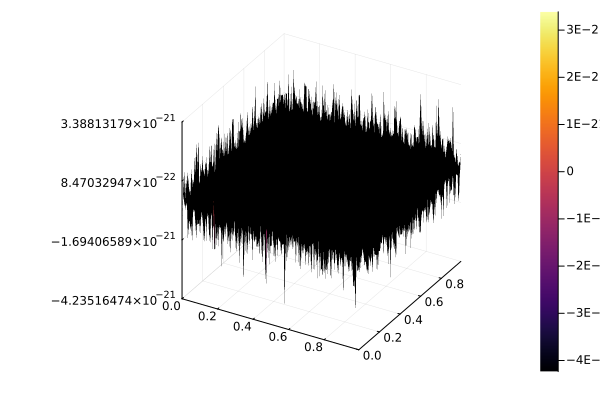

In [12]:
surface(y_p,x_p, S[1,:,:] - S_new[:,:,1])